projet11

In [525]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns
sns.set()

pd.set_option('display.float_format', '{:.2f}'.format)

In [528]:
#Importation du fichier population
df_merge = pd.read_csv("Donnees_preparees.csv", delimiter=',')
display(df_merge)


,Zone,valeur_population,stabilite,valeur_production,Exportations - Quantité,Exportations - Valeur,Importations - Quantité,Importations - Valeur,indice_qualite_vie
0,Afghanistan,30192.62,-2.49,12072.75,1.38,2.31,5409.62,5188.94,34
1,Afrique du Sud,51902.38,-0.10,163444.12,3179.25,3722.81,536.50,7346.88,40
2,Albanie,2969.82,-0.04,6523.75,11.56,7.88,5343.00,3553.75,64
3,Algérie,36685.13,-1.18,128543.19,0.00,0.00,3623.62,16248.50,54
4,Allemagne,81538.96,0.80,116996.12,216731.12,468504.06,147424.62,123145.12,85
...,...,...,...,...,...,...,...,...,...
110,Zambie,14017.04,0.32,34923.50,526.50,1556.12,413.56,1961.06,51
111,Zimbabwe,12972.59,-0.93,21573.12,1125.38,1390.06,308.44,1880.06,38
112,Égypte,84543.52,-1.08,113612.56,1972.25,1058.62,2348.50,1802.50,48
113,Équateur,15151.21,-0.51,146760.69,29.06,103.38,2712.38,9897.00,61


## preparation des données

In [529]:
#mettre les noms des colonnes dans une variable
cols = ['valeur_population', 'stabilite', 'valeur_production', 'Exportations - Quantité','Exportations - Valeur','Importations - Quantité', 'Importations - Valeur','indice_qualite_vie']
#mettre nom de pays dans une variable
names = df_merge.Zone.values
# cree un dataframe uniquement avec les valeurs numerique
df_merge_numeric = df_merge.select_dtypes(include='number')
features = df_merge_numeric.columns
features

Index(['valeur_population', 'stabilite', 'valeur_production',
       'Exportations - Quantité', 'Exportations - Valeur',
       'Importations - Quantité', 'Importations - Valeur',
       'indice_qualite_vie'],
      dtype='object')

# Calcul des composantes principales

In [531]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_merge_numeric)
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# PCA

In [572]:
n_components = 7
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=7)

## Variance

In [573]:
pca.explained_variance_ratio_
# pourcentage dans une variablr
scree = (pca.explained_variance_ratio_*100).round(2)
# Somme cumulé 
scree_cum = scree.cumsum().round()
scree_cum

array([43., 66., 81., 90., 96., 98., 99.])

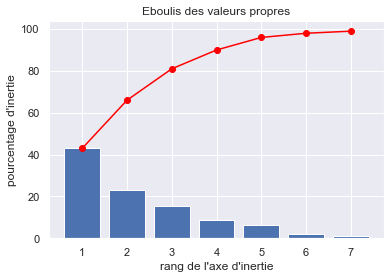

In [575]:
## Eboulis des valeurs propres
x_list = range(1, n_components+1)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## Composant

In [577]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)
pcs.T

,F1,F2,F3,F4,F5,F6,F7
valeur_population,-0.03,0.49,0.51,0.07,0.71,0.06,-0.01
stabilite,0.26,-0.50,0.41,0.01,0.01,0.71,-0.03
valeur_production,-0.02,0.50,0.49,0.03,-0.71,0.08,0.02
Exportations - Quantité,0.48,0.15,-0.09,-0.39,0.02,-0.01,-0.45
Exportations - Valeur,0.44,0.18,-0.09,-0.58,0.02,0.01,0.19
Importations - Quantité,0.48,0.15,-0.18,0.35,0.01,0.07,0.71
Importations - Valeur,0.43,0.13,-0.15,0.63,-0.03,-0.03,-0.50
indice_qualite_vie,0.29,-0.41,0.51,0.02,-0.01,-0.70,0.07


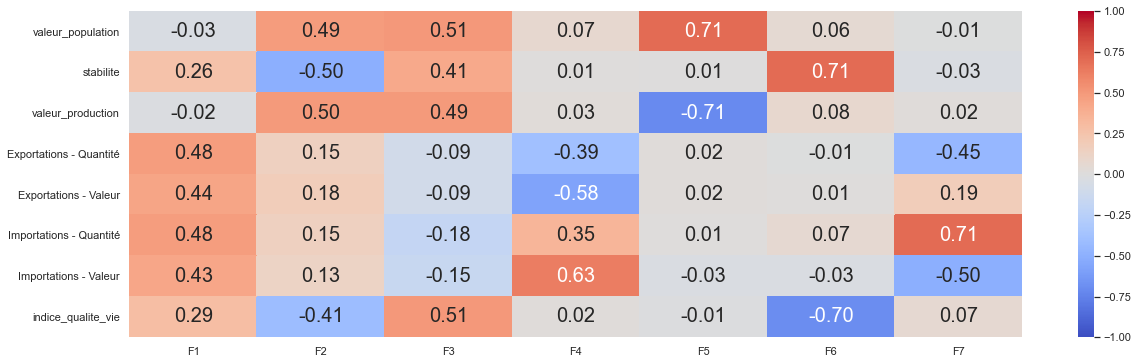

In [578]:
#heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

# Graphique de corrélation

In [579]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(19,18))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1),fontsize=20)
    # Modification de la taille de la police des axes x et y
    plt.xticks(fontsize=20)  # Remplacez 12 par la taille de la police souhaitée pour les axes x
    plt.yticks(fontsize=20)  # Remplacez 12 par la taille de la police souhaitée pour les axes y



    # Modification de la taille de l'échelle
    plt.axis('equal')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.rcParams.update({'font.size': 20}) 
    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)
    


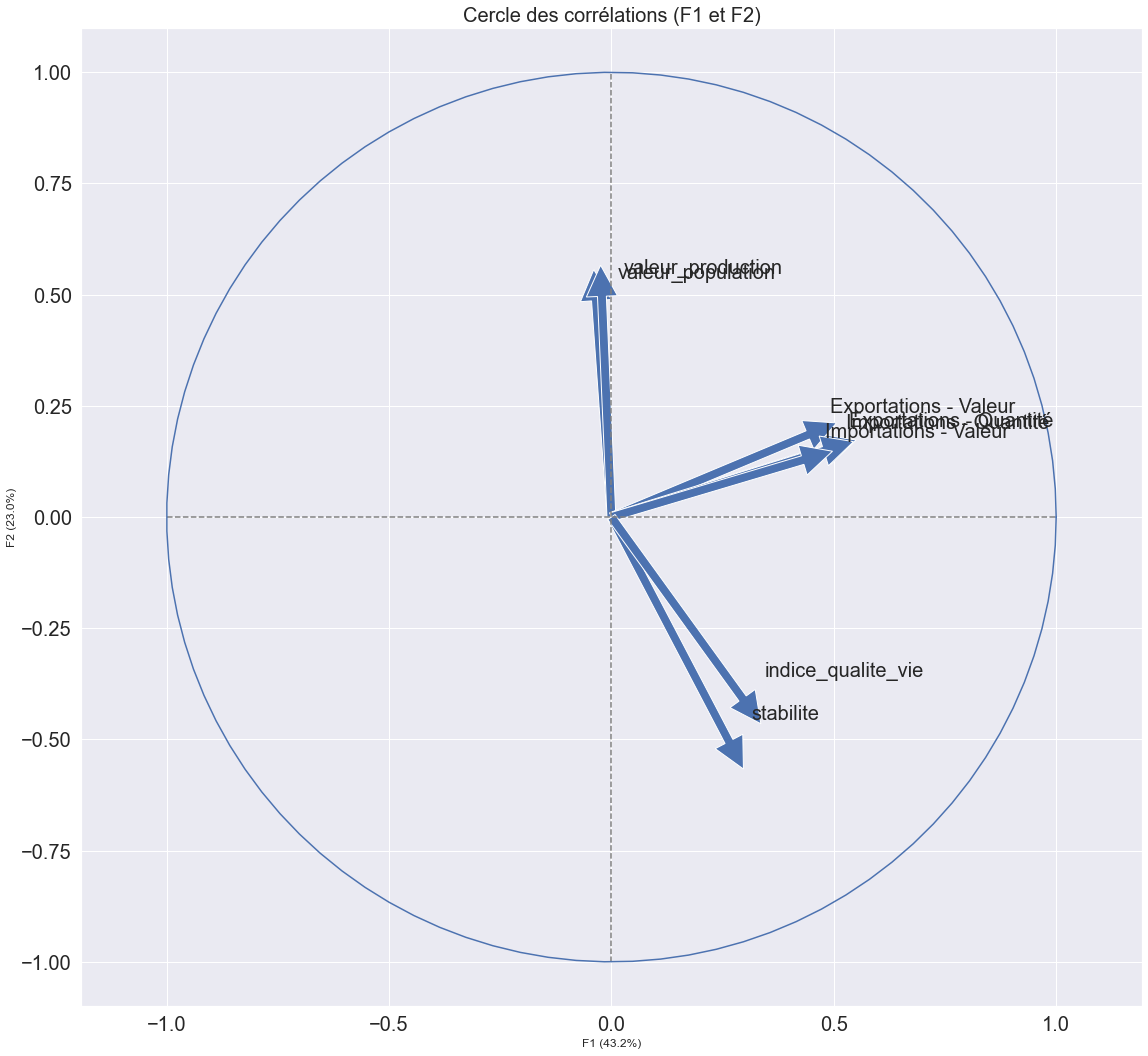

In [580]:
    x_y = (0,1)

correlation_graph(pca, x_y, features)

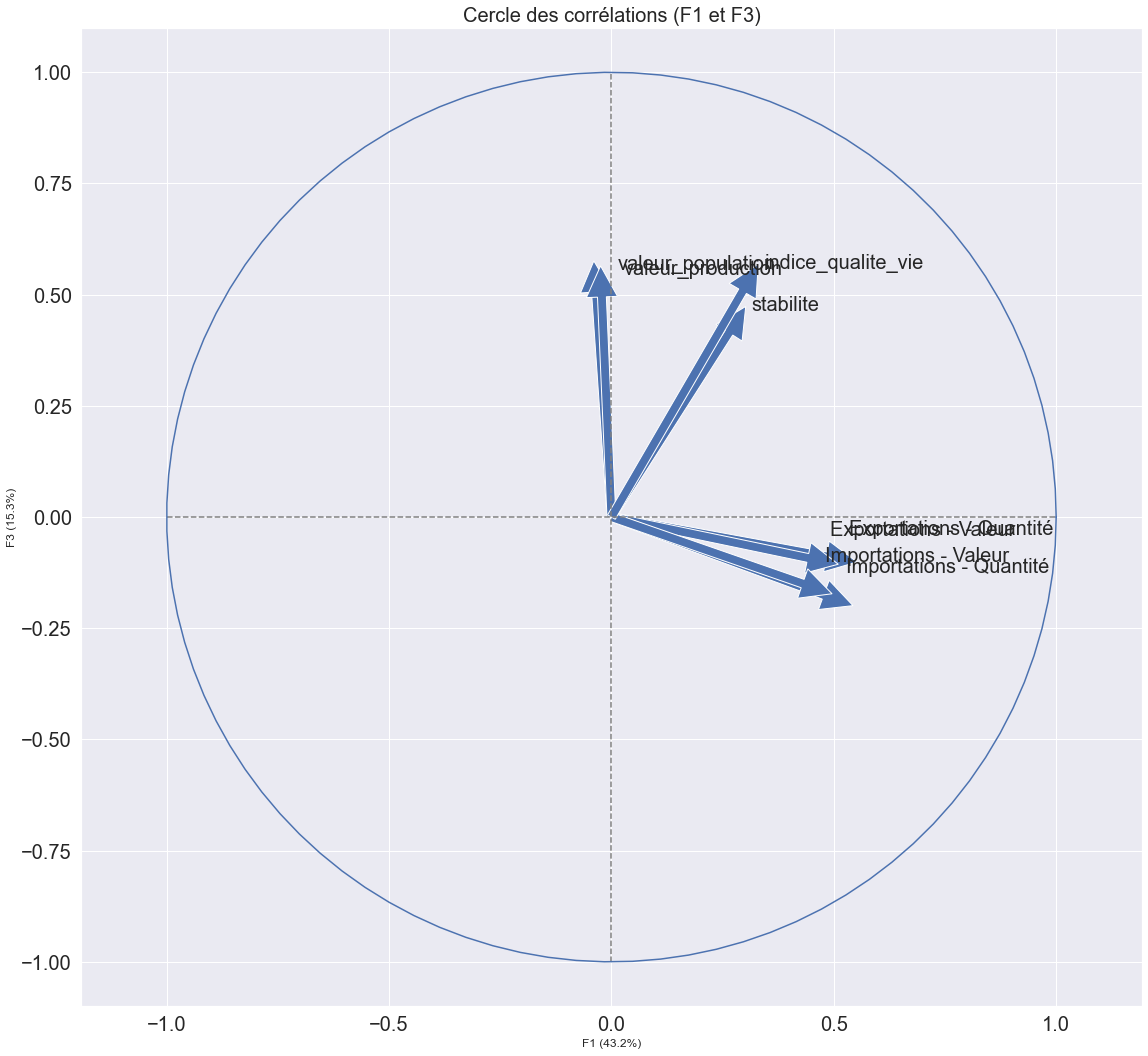

In [581]:
    x_y = (0,2)

correlation_graph(pca, x_y, features)

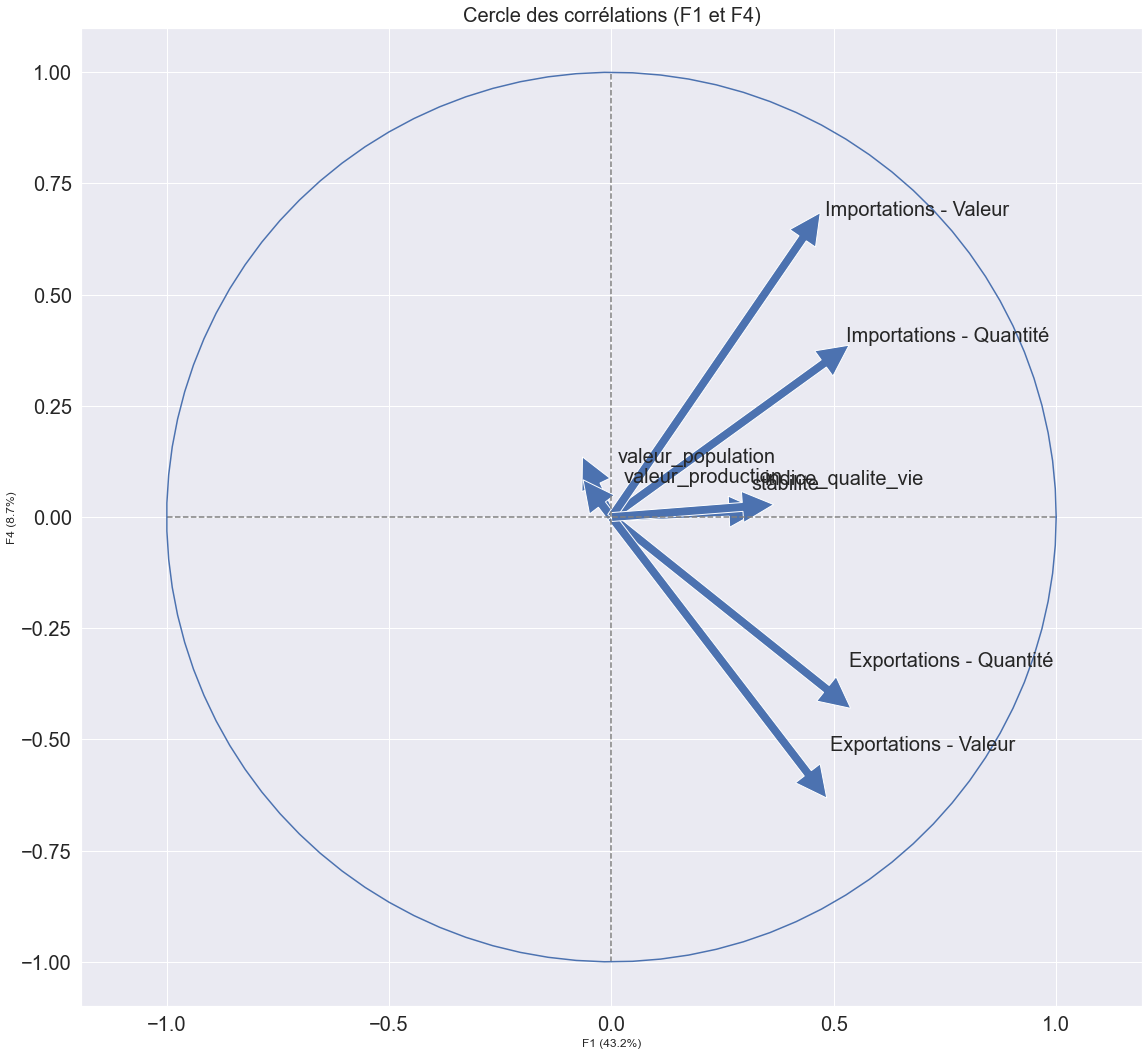

In [585]:
    x_y = (0,3)

correlation_graph(pca, x_y, features)

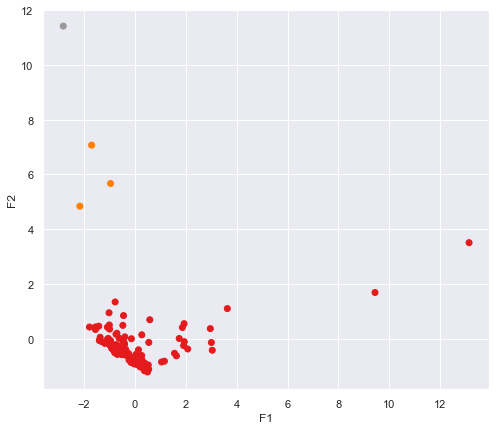

In [692]:
# On instancie notre Kmeans avec 3 clusters : 
kmeans = KMeans(n_clusters=3)

# On l'entraine : 
kmeans.fit(df_merge_numeric)

# On peut stocker nos clusters dans une variable labels : 
labels = kmeans.labels_
# On peut stocker nos centroids dans une variable : 
centroids = kmeans.cluster_centers_
centroids
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_merge_numeric)
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3"])
X_proj[:10]
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

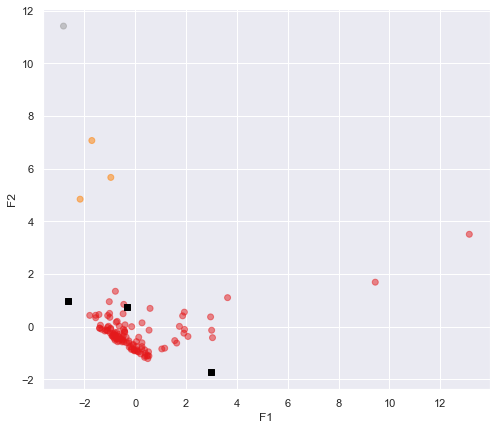

In [693]:
# On utilise bien le scaler déjà entrainé : 
centroids_scaled = scaler.fit_transform(centroids)

# et on utilise l'ACP déjà entrainée : 
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3"], 
                              index=["cluster_0", "cluster_1", "cluster_2"])
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

Text(0.5, 0, 'F3')

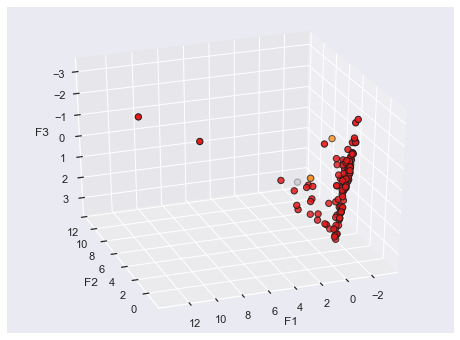

In [694]:
# On définit notre figure et notre axe différemment : 
fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# On affiche nos points : 
ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels, cmap="Set1", edgecolor="k", s=40)

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")


## Projection

In [680]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-1.55083157,  0.33902887, -2.59133671],
       [-0.7453889 ,  0.16841976, -0.61515414],
       [-0.25488296, -0.61747376,  0.1741277 ],
       [-0.7067137 ,  0.20081074, -0.90841911],
       [13.13911215,  3.50971403, -3.13245577]])

In [682]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *0.9
    y_max = np.abs(X_[:, y]).max() *0.9

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

## Projection des individus

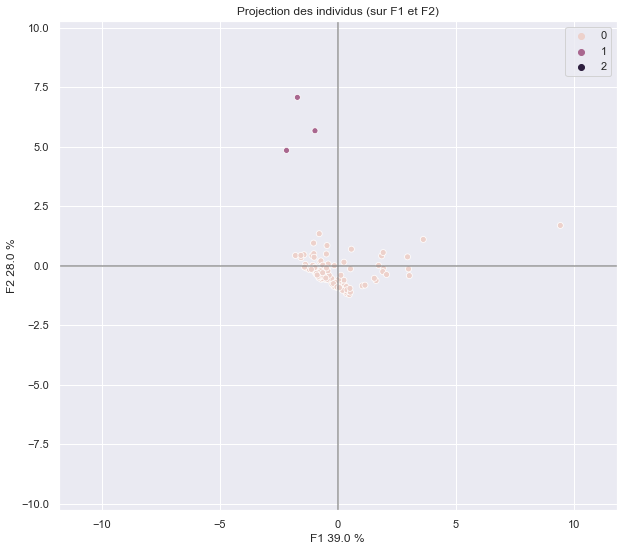

In [746]:
display_factorial_planes(X_proj, x_y=(0,1), 
                         clusters=labels, 
                         pca=pca, 
                         figsize=(10, 9), 
                         alpha=1 )

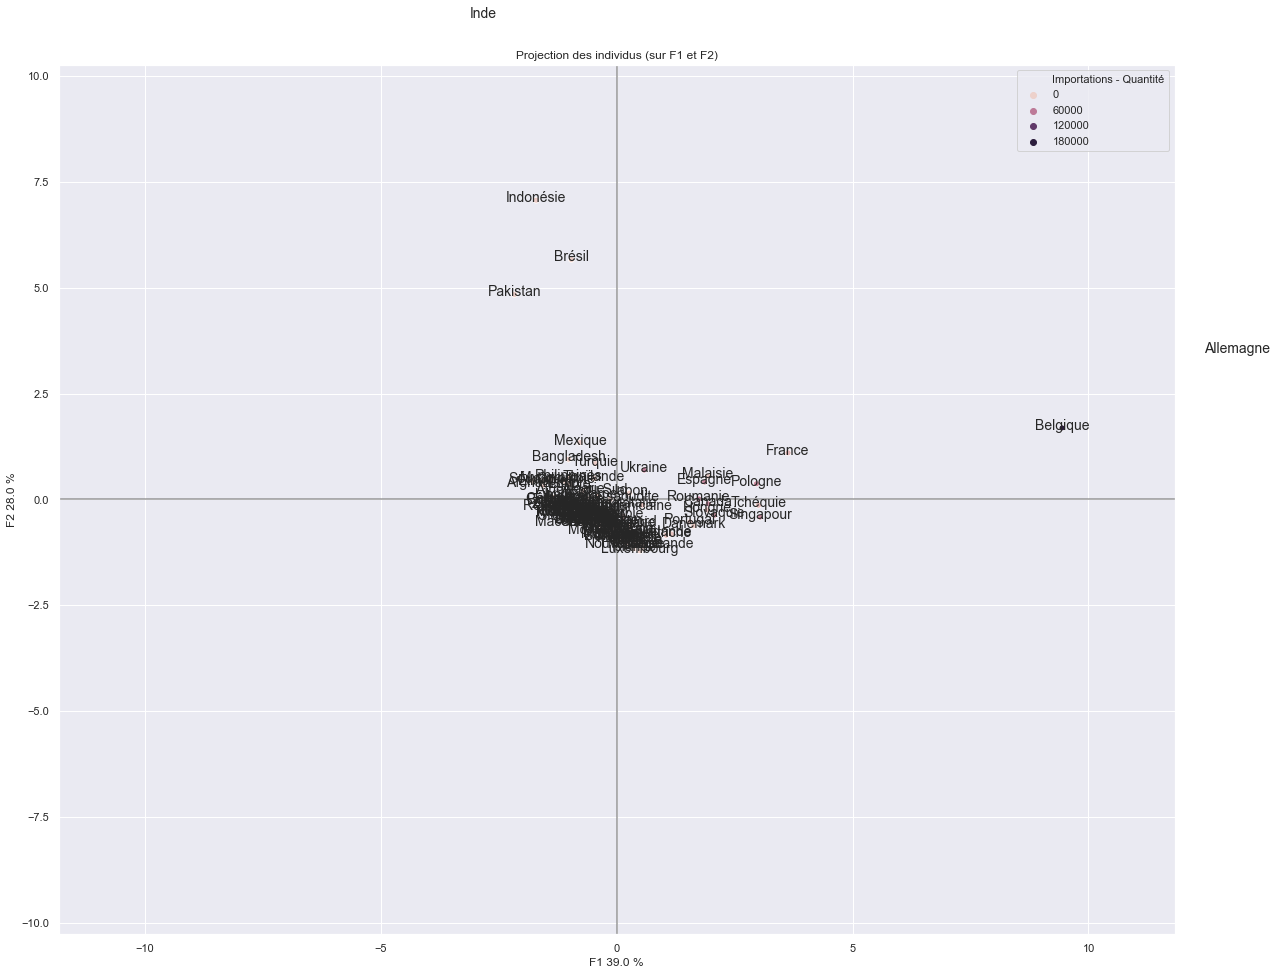

In [691]:
#'valeur_population', 'stabilite', 'valeur_production',
#       'Exportations - Quantité', 'Exportations - Valeur',
#       'Importations - Quantité', 'Importations - Valeur',
#       'indice_qualite_vie'
display_factorial_planes(X_proj, (0,1), pca, labels=names, figsize=(20,16), clusters=df_merge_numeric['Importations - Quantité'], marker="os")

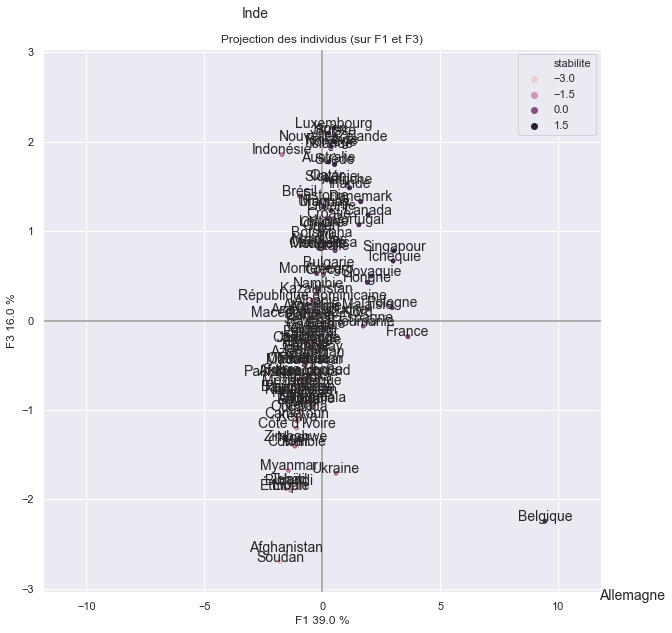

In [773]:
display_factorial_planes(X_proj, (0,2), pca, labels=names, figsize=(10,10), clusters=df_merge_numeric['stabilite'],marker="os")

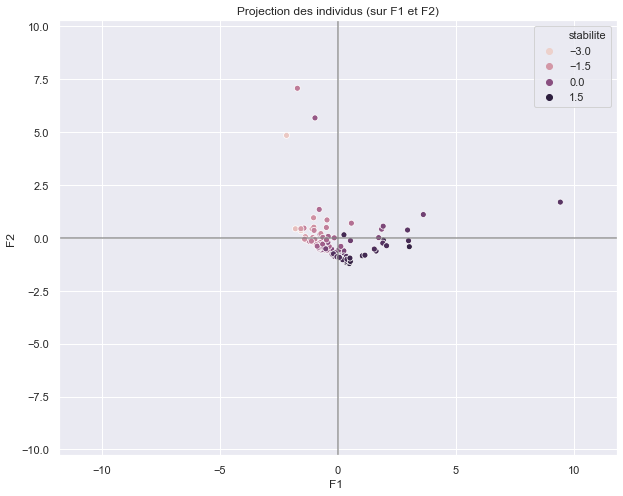

In [769]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df_merge_numeric['stabilite'])

## Clustering

### K-means

In [653]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_merge_numeric)
kmeans.inertia_

1880981957486.559

#### Méthode du coude

In [727]:
intertia = []
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [785]:
# on stocke l'inertie
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_merge_numeric) 
  intertia.append(kmeans.inertia_)

ValueError: x and y must have same first dimension, but have shapes (9,) and (18,)

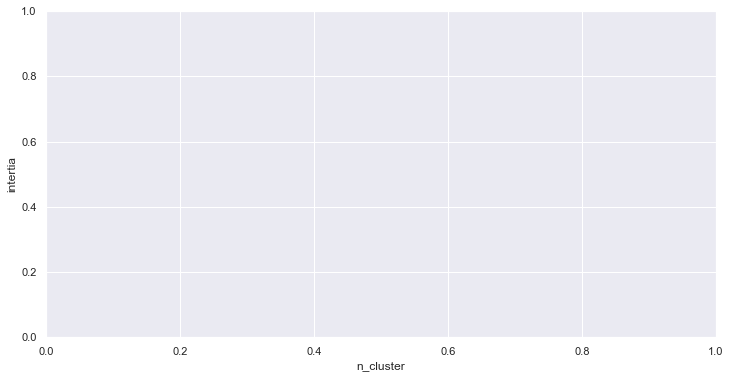

In [784]:
#affichage du diagramme
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

### Cluster

In [776]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_merge_numeric)

KMeans(n_clusters=3)

In [777]:
# Visualisation des cluster
kmeans.labels_
cluster = kmeans.labels_
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [778]:
dd = {i:j for i,j in enumerate(list("012"))}
labels = [dd[i] for i in kmeans.labels_]
df_merge_numeric["cluster"] = labels
df_merge_numeric

,valeur_population,stabilite,valeur_production,Exportations - Quantité,Exportations - Valeur,Importations - Quantité,Importations - Valeur,indice_qualite_vie,cluster
0,30192.62,-2.49,12072.75,1.38,2.31,5409.62,5188.94,34,0
1,51902.38,-0.10,163444.12,3179.25,3722.81,536.50,7346.88,40,0
2,2969.82,-0.04,6523.75,11.56,7.88,5343.00,3553.75,64,0
3,36685.13,-1.18,128543.19,0.00,0.00,3623.62,16248.50,54,0
4,81538.96,0.80,116996.12,216731.12,468504.06,147424.62,123145.12,85,0
...,...,...,...,...,...,...,...,...,...
110,14017.04,0.32,34923.50,526.50,1556.12,413.56,1961.06,51,0
111,12972.59,-0.93,21573.12,1125.38,1390.06,308.44,1880.06,38,0
112,84543.52,-1.08,113612.56,1972.25,1058.62,2348.50,1802.50,48,0
113,15151.21,-0.51,146760.69,29.06,103.38,2712.38,9897.00,61,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

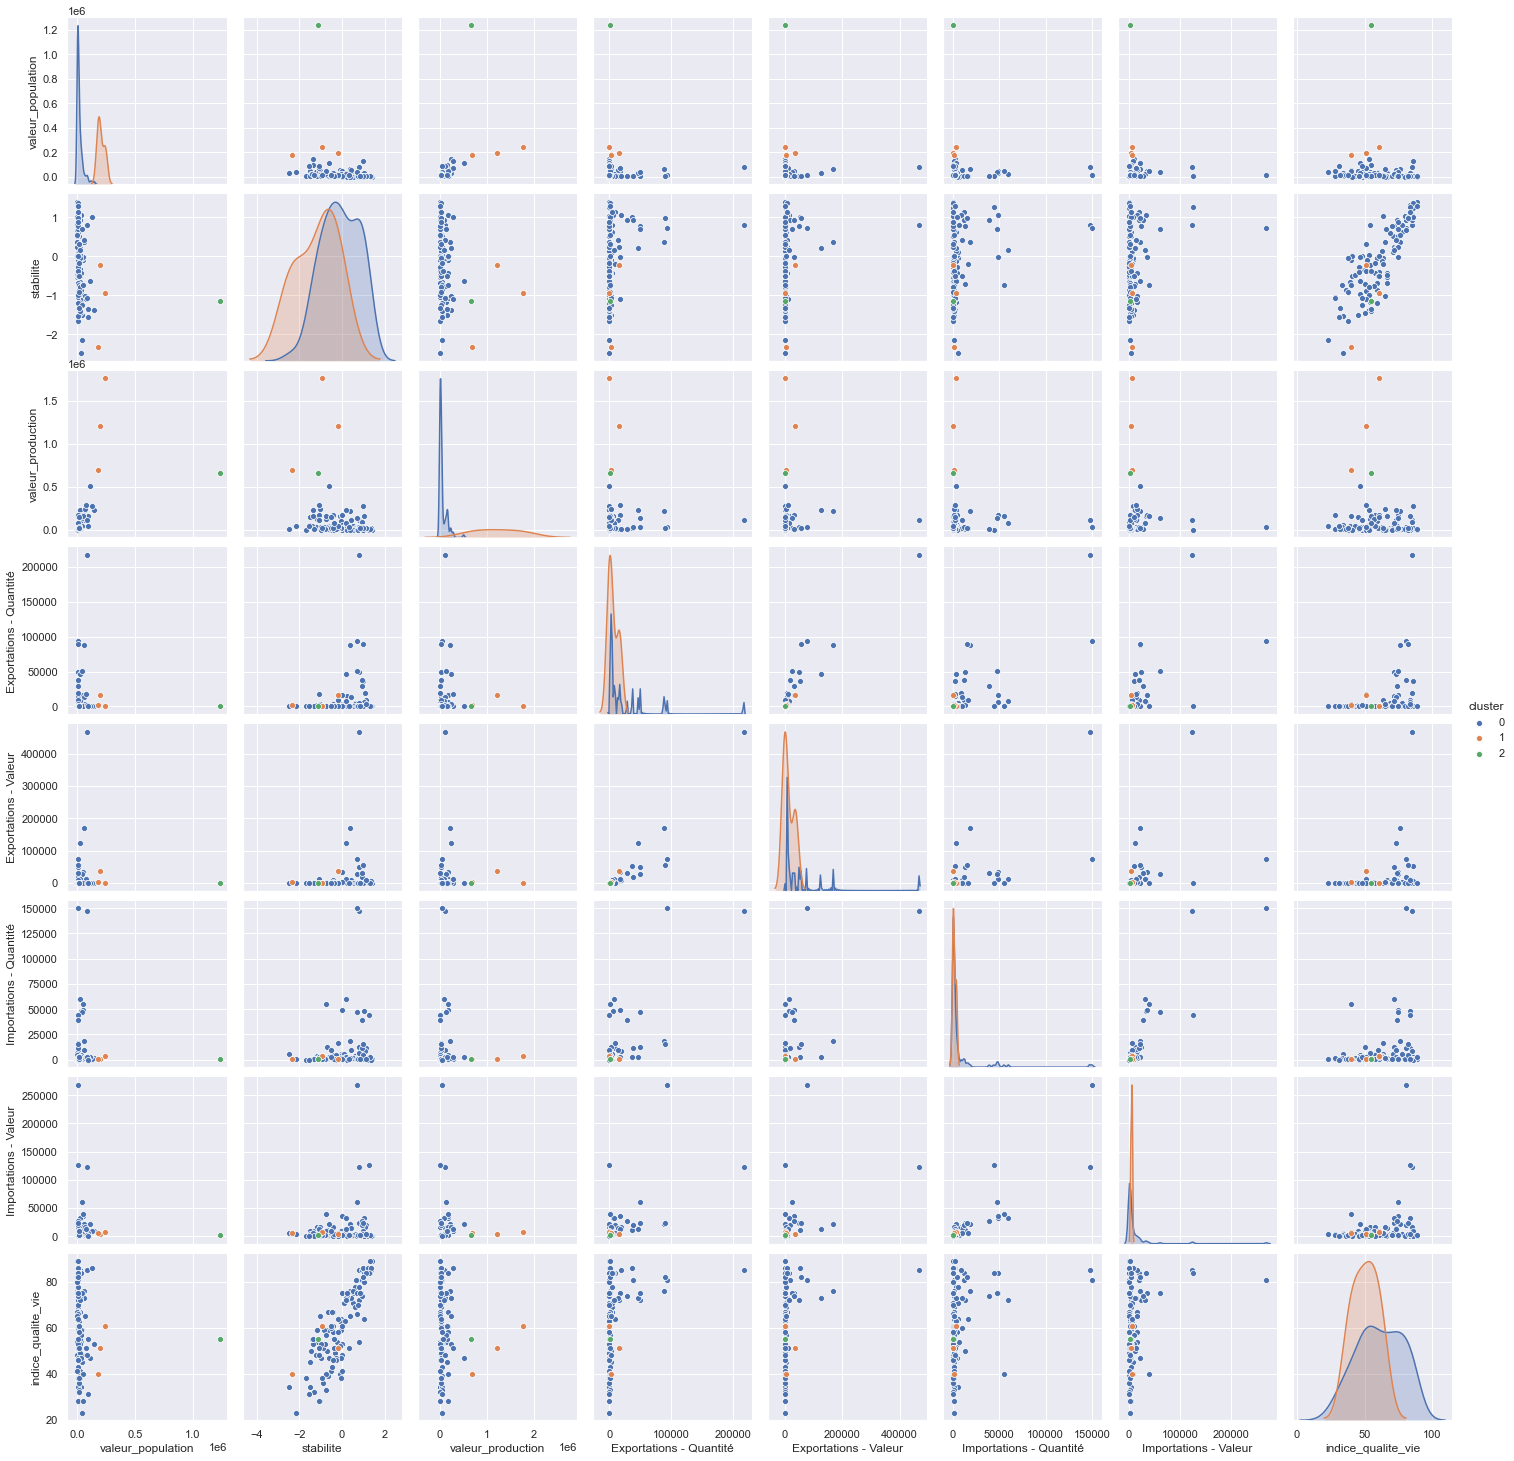

In [779]:
sns.pairplot(df_merge_numeric, hue="cluster")

### Classification hierarchique

#### Méthode de ward

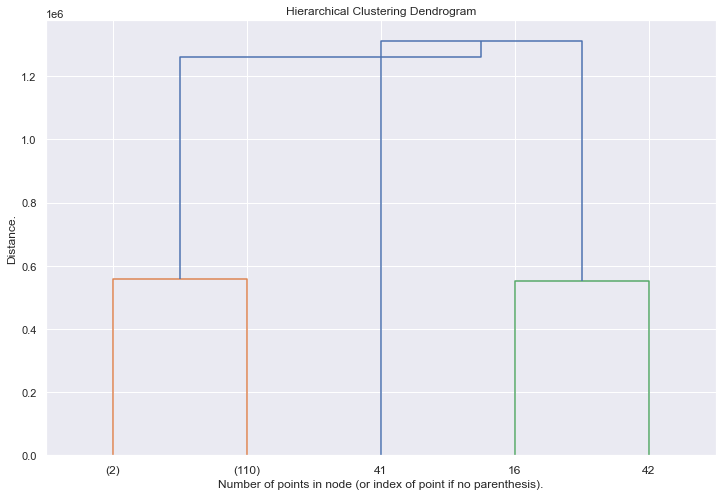

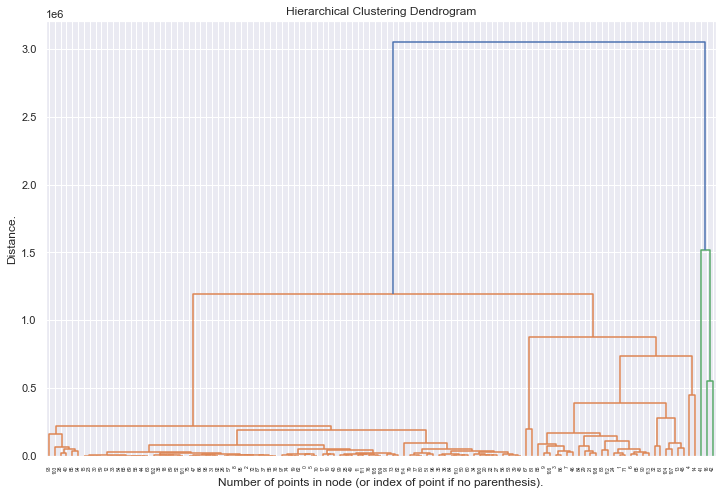

In [780]:
Z = linkage(df_merge_numeric, method="centroid")
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
# Calculer les liens entre les points avec la méthode CAH
Z = hierarchy.linkage(df_merge_numeric, method='ward')

# Afficher le dendrogramme
plt.figure(figsize=(12, 8))
dn = hierarchy.dendrogram(Z)

# Ajouter les titres et les étiquettes
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")

# Afficher le dendrogramme
plt.show()

In [783]:
df_test = pd.DataFrame({"name" : pays,  "cluster" : clusters})
df_test.head()
for i in range(0, 3) : 
    # on fait une selection
    sub_df = df_test.loc[df_test.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les noms et les themes de chaque ligne
    names_list = sub_df.name.values


    # on créé une liste de couple nom/theme
    ziped = zip(names_list) 
    txt = [f"{n} " for n in ziped]

    # on transforme en str
    txt = " ".join(txt)
 
    # on print
    print(txt)
    print("\n\n")

cluster : 0
('Afrique du Sud',)  ('Algérie',)  ('Arabie saoudite',)  ('Argentine',)  ('Australie',)  ('Colombie',)  ('France',)  ('Indonésie',)  ('Malaisie',)  ('Roumanie',)  ("Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",)  ('Turquie',)  ('Viet Nam',)  ('Égypte',) 



cluster : 1
('Afghanistan',)  ('Albanie',)  ('Allemagne',)  ('Angola',)  ('Antigua-et-Barbuda',)  ('Arménie',)  ('Autriche',)  ('Azerbaïdjan',)  ('Bahamas',)  ('Bahreïn',)  ('Bangladesh',)  ('Barbade',)  ('Belgique',)  ('Belize',)  ('Bhoutan',)  ('Bolivie (État plurinational de)',)  ('Bosnie-Herzégovine',)  ('Botswana',)  ('Brunéi Darussalam',)  ('Brésil',)  ('Bulgarie',)  ('Burkina Faso',)  ('Burundi',)  ('Bélarus',)  ('Bénin',)  ('Cabo Verde',)  ('Cambodge',)  ('Cameroun',)  ('Canada',)  ('Chili',)  ('Chine - RAS de Hong-Kong',)  ('Chine - RAS de Macao',)  ('Chypre',)  ('Comores',)  ('Congo',)  ('Costa Rica',)  ('Croatie',)  ('Cuba',)  ("Côte d'Ivoire",)  ('Danemark',)  ('Djibouti',)  ('Dominique',)  ('El Salva